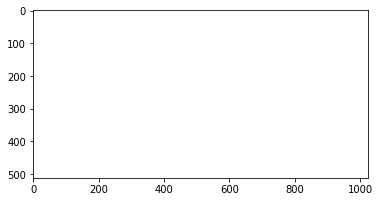

In [10]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFont
from matplotlib import rc
rc('animation', html='jshtml')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# angle of rotation
# center of scale and rotation
# new_center is displacement
# scale
def scale_rotate_translate(image, angle, sr_center=None, displacment=None, scale=None):
    if sr_center is None:
        sr_center = 0, 0
    if displacment is None:
        displacment = 0, 0
    if scale is None:
        scale = 1, 1

    angle = -angle / 180.0 * np.pi

    C = np.array([[1, 0, -sr_center[0]],
                  [0, 1, -sr_center[1]],
                  [0, 0, 1]])

    C_1 = np.linalg.inv(C)

    S = np.array([[1/scale[0], 0, 0],
                  [0, 1/scale[1], 0],
                  [0,        0, 1]])

    R = np.array([[np.cos(angle), np.sin(angle), 0],
                  [-np.sin(angle), np.cos(angle), 0],
                  [0,                         0, 1]])

    D = np.array([[1, 0, displacment[0]],
                  [0, 1, displacment[1]],
                  [0, 0,            1]])

    Mt = np.dot(D, np.dot(C_1, np.dot(R, np.dot(S, C))))

    a, b, c = Mt[0]
    d, e, f = Mt[1]

    return image.transform(image.size, Image.AFFINE, (a, b, c, d, e, f), resample=Image.BICUBIC)

def fft2d(image, show=True):
    im1 = np.array(image)
    image_fft = np.fft.fftshift(np.fft.fft2(np.array(image)))
    im2 = 255 * np.abs(image_fft) / np.abs(image_fft).max()
    img = np.concatenate([im1, im2], axis=1)
    if show:
        plt.rcParams['figure.figsize'] = [14, 14]
        return imshow(img, cmap='Greys_r')
    else:
        return img

image = Image.new('L', (512, 512))
draw = ImageDraw.Draw(image)
font=ImageFont.truetype("LiberationSans-Italic.ttf", 30)
draw.text((256, 256), 'A', 255, font=font)

targets = [{'angle' : 34, 'scale' : np.array([2.6, 4.2]), 'displacement' : np.array([50, 50])},
           {'angle' : 0, 'scale' : np.array([0.5, 2]), 'displacement' : np.array([0, 0])}]

images = [image]
N = 100

for target in targets:
    for i in range(N):
        angle = (target['angle'] / N) * i
        scale = np.array([1, 1]) + (target['scale'] - np.array([1, 1])) * i / N
        displacment = target['displacement'] * i / N
        transformed_image = scale_rotate_translate(image, angle=angle, scale=scale, sr_center=(256, 256), displacment=displacment)
        images.append(transformed_image)
    image = transformed_image

fig, ax = plt.subplots()

ims = []

for image in images:
    im = ax.imshow(fft2d(image, show=False), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

In [11]:
ani

Output hidden; open in https://colab.research.google.com to view.

In [12]:
#writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=-1, codec='libx264',
#                                extra_args=['-pix_fmt', 'yuv420p'])
ani.save("movie.mp4", dpi=200)